In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
import json
from pprint import pprint
# Import the API key.
from config import weather_api_key
import numpy as np
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [4]:
# create a list for holding the cities.
cities= []

# Identify each city for nearest lat and lng in combination.

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # if the city is unique then add it to our cities list.
    
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count.
len(cities)




617

In [5]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quatre cocos
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | salalah
Processing Record 4 of Set 1 | clarence town
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | del rio
Processing Record 11 of Set 1 | north bend
Processing Record 12 of Set 1 | ahuimanu
Processing Record 13 of Set 1 | langen
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | sur
Processing Record 21 of Set 1 | san quintin
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | yellowknife
Processin

In [7]:
len(city_data)

562

In [8]:
import pandas as pd

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quatre Cocos,-20.2078,57.7625,69.10,77,49,14.76,MU,2022-07-23 23:10:36
1,Rikitea,-23.1203,-134.9692,72.91,63,0,8.39,PF,2022-07-23 23:10:36
2,Salalah,17.0151,54.0924,77.09,94,75,6.91,OM,2022-07-23 23:07:52
3,Clarence Town,-32.5833,151.7833,54.99,84,17,1.83,AU,2022-07-23 23:10:37
4,Caravelas,-17.7125,-39.2481,70.59,76,0,6.64,BR,2022-07-23 23:10:37
5,Mataura,-46.1927,168.8643,42.21,69,80,1.36,NZ,2022-07-23 23:10:37
6,Hilo,19.7297,-155.0900,85.28,87,100,6.91,US,2022-07-23 23:10:38
7,Jamestown,42.0970,-79.2353,79.72,81,75,5.75,US,2022-07-23 23:10:38
8,Albany,42.6001,-73.9662,91.17,47,19,3.40,US,2022-07-23 23:10:38
9,Del Rio,29.3627,-100.8968,100.80,26,0,18.41,US,2022-07-23 23:10:39


In [10]:
# reorder the columns as city,country, date,lat,lng,max temp,humidity, cloudiness, and wind speed, so they are easier to read:

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2022-07-23 23:10:36,-20.2078,57.7625,69.10,77,49,14.76
1,Rikitea,PF,2022-07-23 23:10:36,-23.1203,-134.9692,72.91,63,0,8.39
2,Salalah,OM,2022-07-23 23:07:52,17.0151,54.0924,77.09,94,75,6.91
3,Clarence Town,AU,2022-07-23 23:10:37,-32.5833,151.7833,54.99,84,17,1.83
4,Caravelas,BR,2022-07-23 23:10:37,-17.7125,-39.2481,70.59,76,0,6.64
...,...,...,...,...,...,...,...,...,...
557,Socorro,US,2022-07-23 23:25:23,31.6546,-106.3033,101.50,22,75,14.97
558,Qeshm,IR,2022-07-23 23:25:24,26.9581,56.2719,89.49,85,72,12.44
559,Porto Santo,PT,2022-07-23 23:25:24,33.0720,-16.3415,69.40,91,3,11.14
560,Frolovo,RU,2022-07-23 23:25:24,49.7713,43.6622,60.39,88,72,6.89


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# # Get today's date in seconds.
# today = time.strftime("%x")
# today

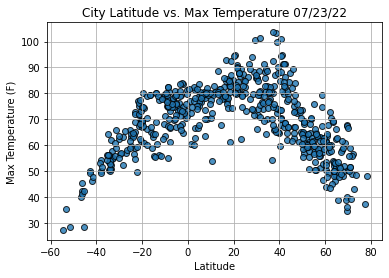

In [14]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_max_temp.png")

# Show plot.
plt.show()

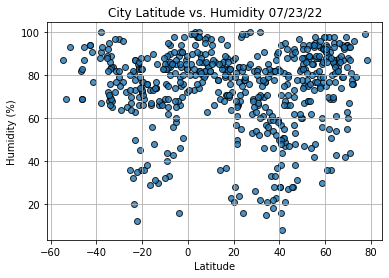

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lat_vs_humidity.png")
# Show plot.
plt.show()

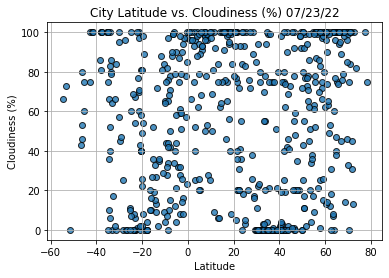

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lat_vs_cloudiness.png")
# Show plot.
plt.show()

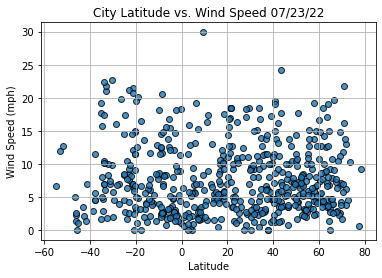

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lat_vs_windspeed.png")
# Show plot.
plt.show()

In [18]:
from scipy.stats import linregress

In [19]:
# create a function to perfrom linear regression on the weather data:
# Also, plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on the hemisphere weather data>
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-07-23 23:08:16
Lat                         -46.6
Lng                      168.3333
Max Temp                    39.79
Humidity                       82
Cloudiness                     43
Wind Speed                   5.01
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Salalah,OM,2022-07-23 23:07:52,17.0151,54.0924,77.09,94,75,6.91
6,Hilo,US,2022-07-23 23:10:38,19.7297,-155.0900,85.28,87,100,6.91
7,Jamestown,US,2022-07-23 23:10:38,42.0970,-79.2353,79.72,81,75,5.75
8,Albany,US,2022-07-23 23:10:38,42.6001,-73.9662,91.17,47,19,3.40
9,Del Rio,US,2022-07-23 23:10:39,29.3627,-100.8968,100.80,26,0,18.41


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

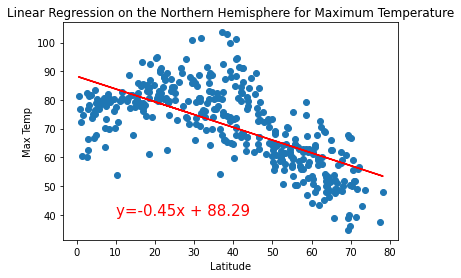

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

#### may need to change text coordinates on the graph above to see the equation containing the data.

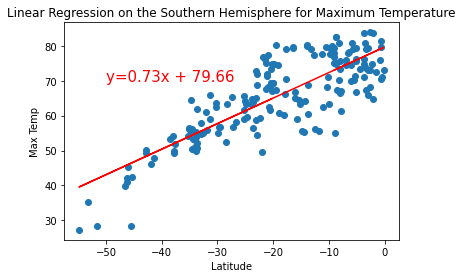

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,70))


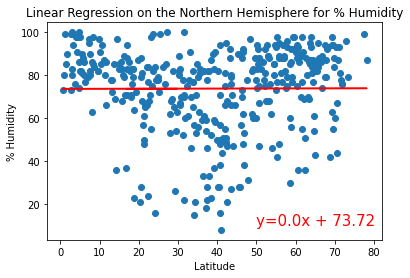

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,10))

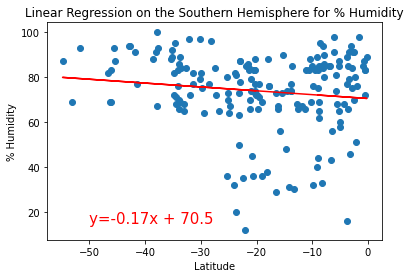

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

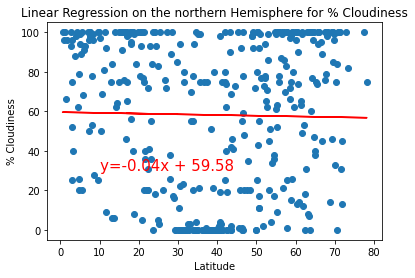

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere for % Cloudiness', '% Cloudiness',(10,30))

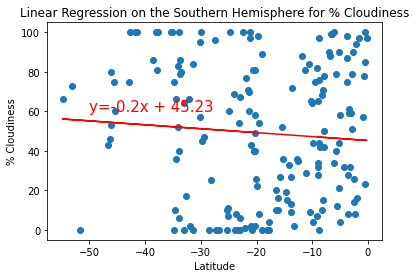

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

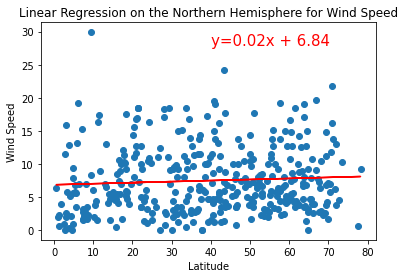

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,28))

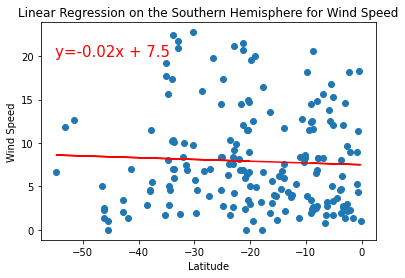

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,20))